In [1]:
%matplotlib inline
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}'
from matplotlib import rc
rc('text', usetex=True)

from tqdm import tqdm

from PETITE.ryan_shower import Shower
from PETITE.particle import *
from PETITE.shower import Shower as OldShower

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfontBig=font0.copy()
legfontBig.set_size(18)
legfontBig.set_weight('bold')

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [2]:
E0 = 5.0
p0 = Particle(11, E0, 0., 0., np.sqrt(E0**2 - 0.000511**2), 0, 0, 0, 1, 0, 0, 0, -1, 1.)
MinEnergy = 0.001
sGraphite = Shower('/Users/kjkelly/Documents/GitHub/PETITE/RyanDicts/', 'graphite', MinEnergy)
sGraphiteOld = OldShower('/Users/kjkelly/Documents/GitHub/PETITE/NBP/', 'graphite', MinEnergy)
nSamp = 100
s0 = np.array([sGraphite.ElecBremSample(p0)[1] for i in range(nSamp)])
s0Old = np.array([sGraphiteOld.ElecBremSample(p0)[1] for i in range(nSamp)])

In [13]:
ev0 = sGraphite.Draw_Sample(5.0, 73, 'PairProd')
print([ev0[0], ev0[1], ev0[2], ev0[3]])

[0.1868603003974267, 0.13978710520280513, 0.14317728866100732, 3.1249107651504895]


In [31]:
Es = np.array([s.get_p0()[0] for s in s0])
EsOld = np.array([s.get_p0()[0] for s in s0Old])

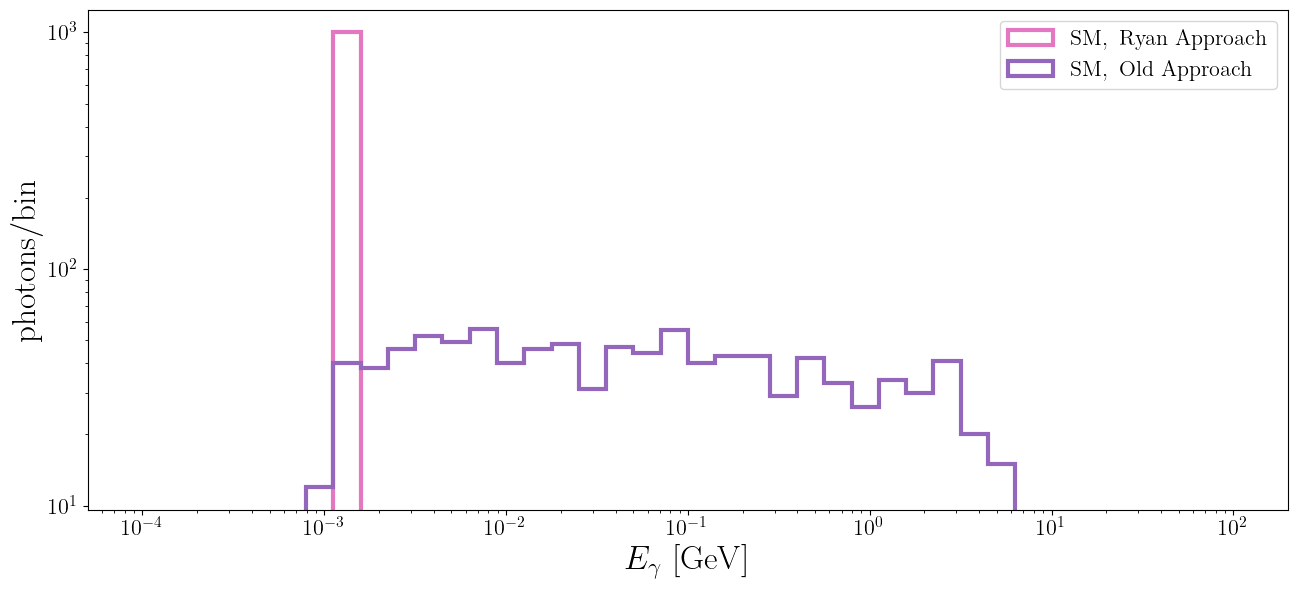

In [33]:
b0 = np.logspace(-4, 2, 41)

plt.hist(Es, bins=b0, histtype='step', lw=3, color='C6', ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(12.0, 5.0)


In [32]:
Es

array([0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140542,
       0.00140542, 0.00140542, 0.00140542, 0.00140542, 0.00140

In [6]:
MinEnergy = 0.015
sGraphite = Shower('/Users/kjkelly/Documents/GitHub/PETITE/RyanDicts/', 'graphite', MinEnergy)
Ee0 = 20.0
SMS = sGraphite.GenShower(11, [Ee0, 0., 0.0, np.sqrt(Ee0**2 - 0.000511**2)], 22, VB=True)

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[20.          0.          0.         19.99999999]


/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/ryan_shower.py:270: RuntimeWarning: overflow encountered in double_scalars
  NewE = Particle(init_IDs[0], Eef, pe3LF[0], pe3LF[1], pe3LF[2], pos[0], pos[1], pos[2], 2*(init_IDs[1])+0, init_IDs[1], init_IDs[0], init_IDs[4]+1,process_code['Brem'], 1.0)
/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/ryan_shower.py:271: RuntimeWarning: overflow encountered in double_scalars
  NewG = Particle(22, Egf, pg3LF[0], pg3LF[1], pg3LF[2], pos[0], pos[1], pos[2], 2*(init_IDs[1])+1, init_IDs[1], init_IDs[0], init_IDs[4]+1, process_code['Brem'], 1.0)


In [7]:
len(SMS)

1920

In [5]:
sGraphiteOld = OldShower('/Users/kjkelly/Documents/GitHub/PETITE/NBP/', 'graphite', MinEnergy)
Ee0 = 20.0
SMSOld = sGraphiteOld.GenShower(11, [Ee0, 0., 0.0, np.sqrt(Ee0**2 - 0.000511**2)], 22, VB=True)

NameError: name 'OldShower' is not defined

In [29]:
len(SMSOld)

402

In [8]:
[ps.get_IDs()[0] for ps in SMS]

[11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,

In [9]:
[ps.get_p0()[0] for ps in SMS]

[20.0,
 19.990919134333375,
 19.988823416610213,
 19.97727763568662,
 19.967863449904193,
 19.963633328494264,
 19.953317976570553,
 19.93699343655856,
 19.9229956995842,
 19.902014427602943,
 19.88613592732854,
 19.865915288357424,
 19.85055596018465,
 19.83995995380204,
 19.806074658842682,
 19.767846712436427,
 19.761978497826558,
 19.741483289426284,
 19.73685677253045,
 19.728625952079934,
 19.7166286704209,
 19.70868538593574,
 19.69614789606617,
 19.682166452908554,
 19.670404745222132,
 19.648189742723336,
 19.636446570890314,
 19.633175283067445,
 19.62741118093204,
 19.62107144076732,
 19.61752534057221,
 19.615573193513033,
 19.611485623205983,
 19.607304020889845,
 19.59771466151408,
 19.58925976338197,
 19.58060896454447,
 19.572570188356707,
 19.56811498735962,
 19.56327396073088,
 19.538383661116253,
 19.533601652423304,
 19.526765196431985,
 19.516479563983378,
 19.506916972036354,
 19.483864036658822,
 19.473414314932135,
 19.45551120782846,
 19.452542140414096,
 19.44

In [10]:
SMSPhotons = np.array(SMS)[np.where([ps.get_IDs()[0] == 22 for ps in SMS])[0]]
print(len(SMSPhotons))

0


In [36]:
SMSPhotons = np.array(SMS)[np.where([ps.get_IDs()[0] == 22 for ps in SMS])[0]]
SMSOldPhotons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == 22 for ps in SMSOld])[0]]

In [37]:
print(len(SMSPhotons), len(SMSOldPhotons))

0 106


In [4]:
LDet0, RDet0 = 574.0, 2.5
def RFront(partV, LDet):
    RF = []
    for part in partV:
        x, y, z = part.get_r0()
        E, px, py, pz = part.get_p0()
        RF.append(np.sqrt((x + px/pz*(LDet-z))**2 + (y + py/pz*(LDet-z))**2))
    return np.array(RF)

In [5]:
SMPhotonShower = PionShower[[ps.get_IDs()[0] == 22 for ps in PionShower]]
SMPhotonShowerPass = SMPhotonShower[RFront(SMPhotonShower, LDet0) < RDet0]

PionDarkBrem = PionDarkShower[[ps.get_IDs()[-2] == 0 for ps in PionDarkShower]]
PionDarkBremPass = PionDarkBrem[RFront(PionDarkBrem, LDet0) < RDet0]

In [6]:
print(np.sum([pds.get_IDs()[-1] for pds in SMPhotonShowerPass])/np.sum([pds.get_IDs()[-1] for pds in SMPhotonShower]), np.sum([pds.get_IDs()[-1] for pds in PionDarkBremPass])/np.sum([pds.get_IDs()[-1] for pds in PionDarkBrem]))

0.004588197600450421 0.0071056336095151685


In [10]:
PhotonsPerPOT = 2.9 * 2.0 * 0.98823
RWFactor = PhotonsPerPOT/NSamp

In [18]:
def FF(Eg, mV):
    xT = mV/(1.0773*Eg + 0.013716)
    expterm = 1154.0*np.exp(-24.42*xT**0.3174)
    if expterm > 1.0:
        expterm = 1.0
    return expterm

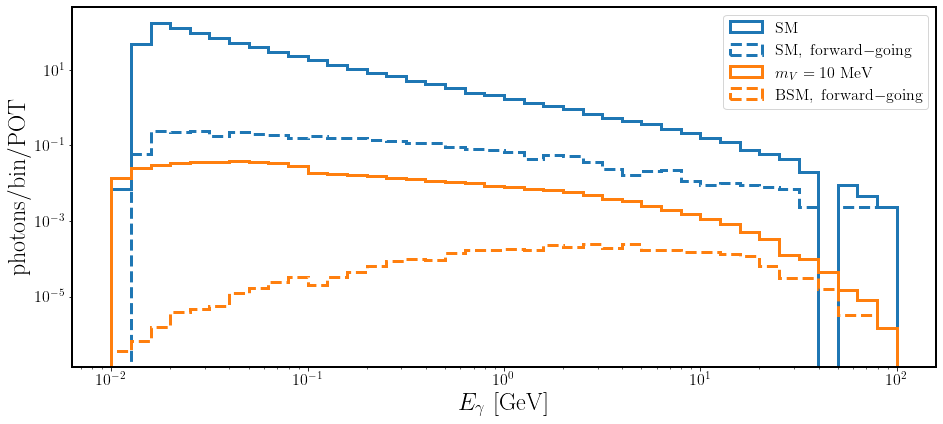

In [21]:
b0 = np.logspace(-2, 2, 41)
SME = [[p0.get_p0()[0], p0.get_IDs()[-1]] for p0 in SMPhotonShower]
SMPE = [[p0.get_p0()[0], p0.get_IDs()[-1]] for p0 in SMPhotonShowerPass]

BSME = [[p0.get_p0()[0], p0.get_IDs()[-1]] for p0 in PionDarkBrem]
BSMPE = [[p0.get_p0()[0], p0.get_IDs()[-1]] for p0 in PionDarkBremPass]

plt.hist(np.transpose(SME)[0], bins=b0, weights=RWFactor*np.transpose(SME)[1], histtype='step', lw=3, color='C0', ls='-', label=r"$\mathrm{SM}$")
plt.hist(np.transpose(SMPE)[0], bins=b0, weights=RWFactor*np.transpose(SMPE)[1], histtype='step', lw=3, color='C0', ls='--', label=r"$\mathrm{SM,\ forward{-}going}$")
plt.hist(np.transpose(BSME)[0], bins=b0, weights=RWFactor*np.transpose(BSME)[1], histtype='step', lw=3, color='C1', ls='-', label=r"$m_V = 10\ \mathrm{MeV}$")
plt.hist(np.transpose(BSMPE)[0], bins=b0, weights=RWFactor*np.transpose(BSMPE)[1], histtype='step', lw=3, color='C1', ls='--', label=r"$\mathrm{BSM,\ forward{-}going}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin/POT}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(12.0, 5.0)


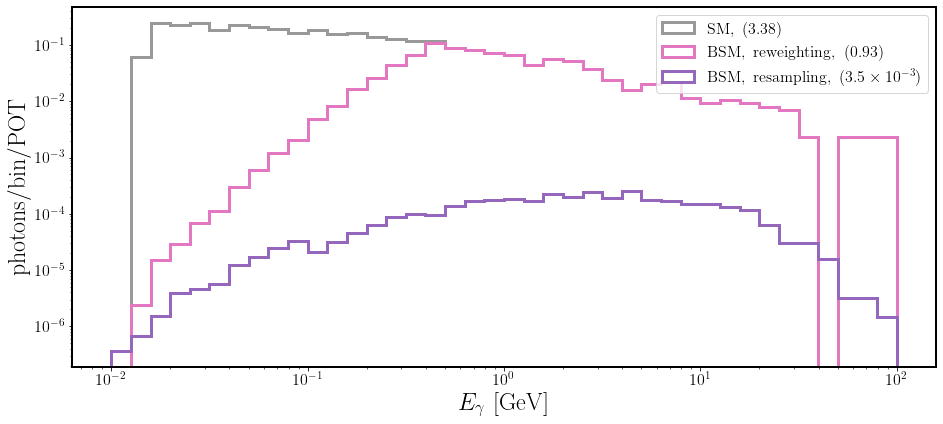

In [26]:
b0 = np.logspace(-2, 2, 41)
SMR = [[sm[0], FF(sm[0], 0.010)*sm[1]] for sm in SMPE]

plt.hist(np.transpose(SMPE)[0], bins=b0, weights=RWFactor*np.transpose(SMPE)[1], histtype='step', lw=3, color='#999999', ls='-', label=r"$\mathrm{SM,\ (3.38)}$")
plt.hist(np.transpose(SMR)[0], bins=b0, weights=RWFactor*np.transpose(SMR)[1], histtype='step', lw=3, color='C6', ls='-', label=r"$\mathrm{BSM,\ reweighting,\ (0.93)}$")
plt.hist(np.transpose(BSMPE)[0], bins=b0, weights=RWFactor*np.transpose(BSMPE)[1], histtype='step', lw=3, color='C4', ls='-', label=r"$\mathrm{BSM,\ resampling,\ (3.5\times 10^{-3})}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin/POT}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(12.0, 5.0)


In [25]:
print(np.sum(RWFactor*np.transpose(SMPE)[1]), np.sum(RWFactor*np.transpose(SMR)[1]), np.sum(RWFactor*np.transpose(BSMPE)[1]))

3.3817230599999997 0.9266488911875587 0.00354075327599727


In [ ]:
from ipywidgets import IntProgress
from IPython.display import display

ModuleNotFoundError: No module named 'ipywidgets'

In [27]:
BSM3D = [[p0.get_p0()[0], np.sqrt(p0.get_p0()[1]**2 + p0.get_p0()[2]**2)/p0.get_p0()[3], p0.get_IDs()[-1]] for p0 in PionDarkBrem]
SM3D = [[p0.get_p0()[0], np.sqrt(p0.get_p0()[1]**2 + p0.get_p0()[2]**2)/p0.get_p0()[3], p0.get_IDs()[-1]] for p0 in SMPhotonShower]
SM3DRW = [[p0.get_p0()[0], np.sqrt(p0.get_p0()[1]**2 + p0.get_p0()[2]**2)/p0.get_p0()[3], FF(p0.get_p0()[0], 0.010)*p0.get_IDs()[-1]] for p0 in SMPhotonShower]


Text(0.5, 0, '$E_V\\ [\\mathrm{GeV}]$')

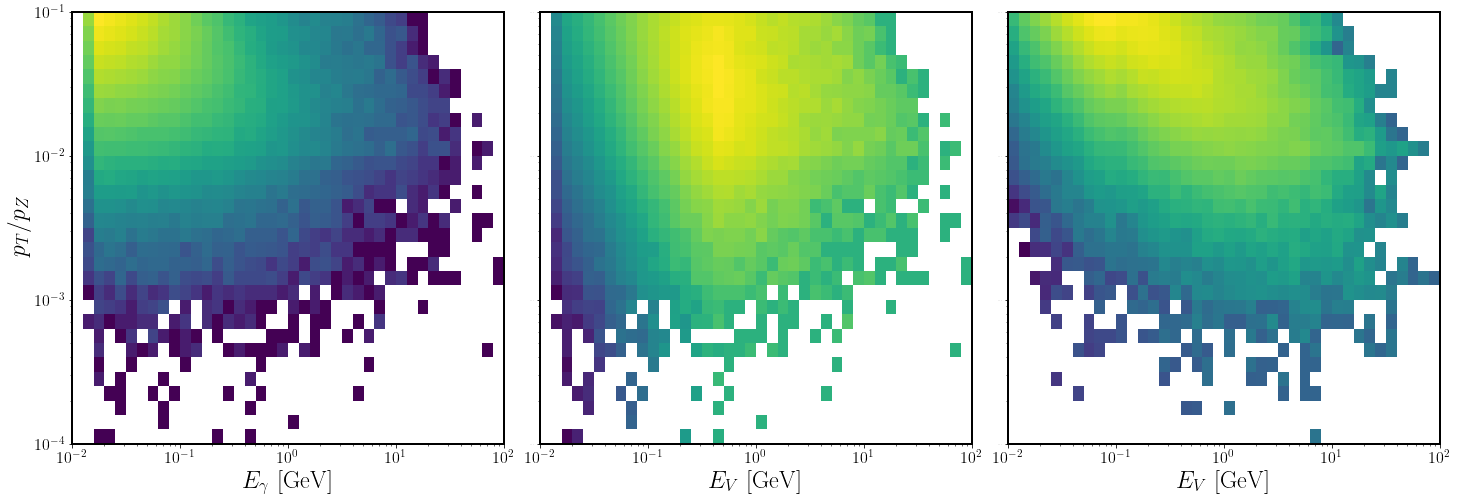

In [28]:
figwid = 6.0
fighei = 6.0
lside = 3.0
rside = 3.5
wwspace = 0.5

ncol = 3
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.5

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

ax = axes[0]
ax.hist2d(np.transpose(SM3D)[0], np.transpose(SM3D)[1], bins=[np.logspace(-2, 2,41), np.logspace(-4,-1,31)], weights=RWFactor*np.transpose(SM3D)[2], norm=matplotlib.colors.LogNorm())

[l.set_size(16) for l in ax.get_xticklabels()]
[l.set_size(16) for l in ax.get_yticklabels()]

#plt.gca().legend(loc=2, fontsize=16)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"$p_T/p_Z$", fontsize=24)
ax.set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)

ax = axes[1]
ax.hist2d(np.transpose(SM3DRW)[0], np.transpose(SM3DRW)[1], bins=[np.logspace(-2, 2,41), np.logspace(-4,-1,31)], weights=RWFactor*np.transpose(SM3DRW)[2], norm=matplotlib.colors.LogNorm())

[l.set_size(16) for l in ax.get_xticklabels()]
[l.set_size(-1) for l in ax.get_yticklabels()]

#plt.gca().legend(loc=2, fontsize=16)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"", fontsize=24)
ax.set_xlabel(r"$E_V\ [\mathrm{GeV}]$", fontsize=24)

ax = axes[2]
ax.hist2d(np.transpose(BSM3D)[0], np.transpose(BSM3D)[1], bins=[np.logspace(-2, 2,41), np.logspace(-4,-1,31)], weights=RWFactor*np.transpose(BSM3D)[2], norm=matplotlib.colors.LogNorm())

[l.set_size(16) for l in ax.get_xticklabels()]
[l.set_size(-1) for l in ax.get_yticklabels()]

#plt.gca().legend(loc=2, fontsize=16)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"", fontsize=24)
ax.set_xlabel(r"$E_V\ [\mathrm{GeV}]$", fontsize=24)

Text(0, 0.5, '$\\mathrm{photons/bin\\ (arb.\\ norm.)}$')

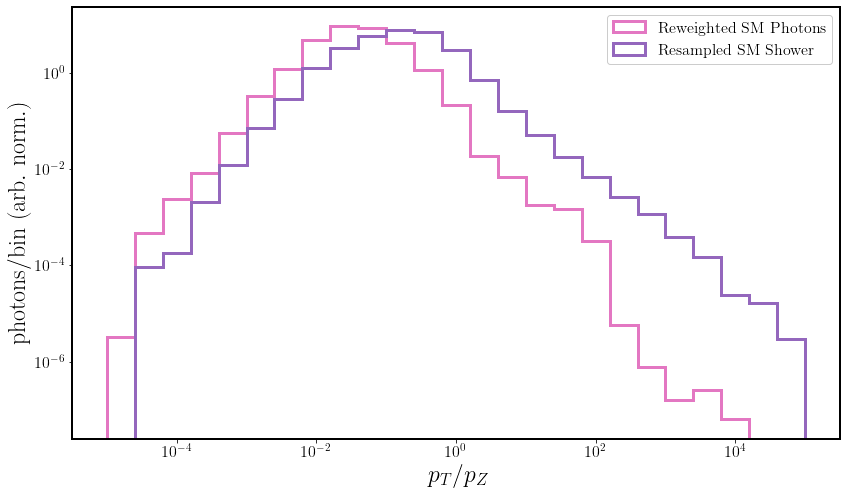

In [54]:
figwid = 6.0*16.0/9.0
fighei = 6.0
lside = 3.0
rside = 3.5
wwspace = 0.5

ncol = 1
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.5

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);



ax = axes
#ax.hist(np.transpose(SM3D)[1], bins=np.logspace(-5,5,101), weights=RWFactor*np.transpose(SM3D)[2], histtype='step', lw=3, color='#999999')
ax.hist(np.transpose(SM3DRW)[1], bins=np.logspace(-5,5,26), weights=RWFactor*np.transpose(SM3DRW)[2], histtype='step', lw=3, color='C6', label=r"$\mathrm{Reweighted\ SM\ Photons}$")
ax.hist(np.transpose(BSM3D)[1], bins=np.logspace(-5,5,26), weights=np.sum(RWFactor*np.transpose(SM3DRW)[2])/np.sum(RWFactor*np.transpose(BSM3D)[2])*RWFactor*np.transpose(BSM3D)[2], histtype='step', lw=3, color='C4', label=r"$\mathrm{Resampled\ SM\ Shower}$")

[l.set_size(16) for l in ax.get_xticklabels()]
[l.set_size(16) for l in ax.get_yticklabels()]

ax.legend(loc='best', fontsize=16, framealpha=1.0)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$p_T/p_Z$", fontsize=24)
ax.set_ylabel(r"$\mathrm{photons/bin\ (arb.\ norm.)}$", fontsize=24)
